In [1]:
%%capture
%cd ".."
%matplotlib widget
%config InlineBackend.print_figure_kwargs={'bbox_inches': None}

import matplotlib
matplotlib.rcParams['figure.dpi'] = 85

# Demo - Welding the classified KRDZ data

In [2]:
%%capture

from src.shaft import KRDZGear
from src.utils import TrackFixityDB

krdzg = KRDZGear(db_instance=TrackFixityDB())

### Define a function that helps weld the classified data

In [3]:
import re

import matplotlib.pyplot as plt
import numpy as np

from src.utils import make_a_polyline


def check_welded_classified_krdz(pcd_date, direction, element):
    tile_xy=None
    
    krdz_dat = krdzg.load_classified_krdz(tile_xy=tile_xy, pcd_date=pcd_date, direction=direction, element=element)

    tiles_coords = krdz_dat[['Tile_X', 'Tile_Y']].to_numpy()
    tiles_convex_hull = krdzg.get_tiles_convex_hull(pcd_tiles=tiles_coords, as_array=True)
    section_start = tiles_convex_hull[-1 if re.search('up', direction) else 0]

    krdz_dat = krdzg.load_classified_krdz(tile_xy=tile_xy, pcd_date=pcd_date, direction=direction, element=element)

    tiles_coords_sorted = make_a_polyline(points_sequence=tiles_coords, start_point=section_start, as_geom=False)

    krdz_dat_ = krdz_dat.set_index(['Tile_X', 'Tile_Y']).loc[tiles_coords_sorted]
    xyz = np.unique(np.vstack(krdz_dat_.geometry.map(lambda x: np.array(x.coords))), axis=0)

    return xyz

## Contents

1\. [Left running edge](#1_left_running_edge)<br>
2\. [Left top of rail](#2_left_top_of_rail)<br>
3\. [Centre](#3_centre)<br>
4\. [Right running edge](#4_right_running_edge)<br>
5\. [Right top of rail](#5_right_top_of_rail)<br>
6\. [Up vs. Down (Left top of rail)](#6_up_vs_down_left_top_of_rail)<br>

## 1. Left running edge <a id='1_left_running_edge'></a>

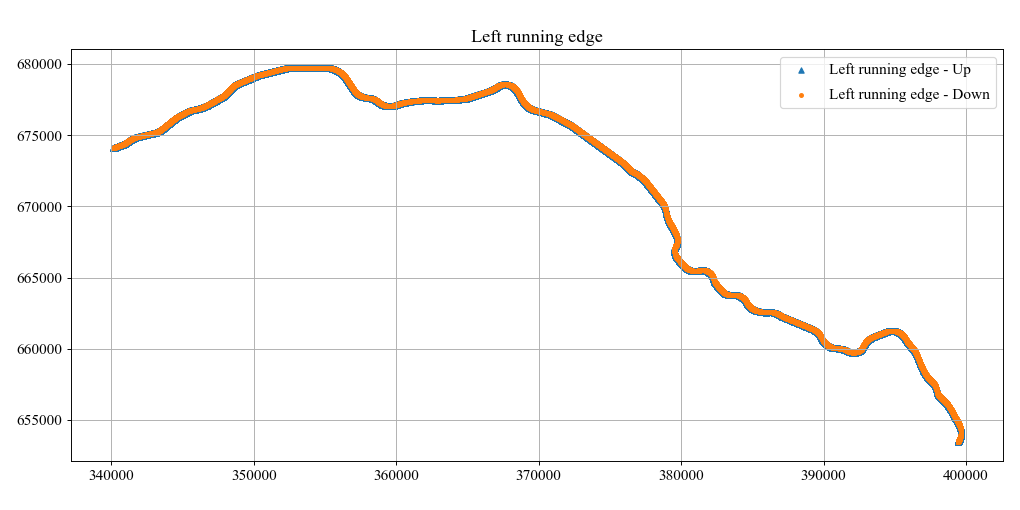

In [4]:
fig1 = plt.figure(num=1, figsize=(12, 6))
ax1 = fig1.add_subplot(aspect='equal', adjustable='box')
ax1.grid()

elem1 = 'Left running edge'

xyz1 = check_welded_classified_krdz('201910', 'up', elem1)
ax1.scatter(xyz1[:, 0], xyz1[:, 1], s=20, marker='^', label=elem1 + ' - Up')
xyz2 = check_welded_classified_krdz('201910', 'down', elem1)
ax1.scatter(xyz2[:, 0], xyz2[:, 1], s=10, marker='o', label=elem1 + ' - Down')

ax1.set_title(elem1)

ax1.legend()
fig1.tight_layout()

## 2. Left top of rail <a id='2_left_top_of_rail'></a>

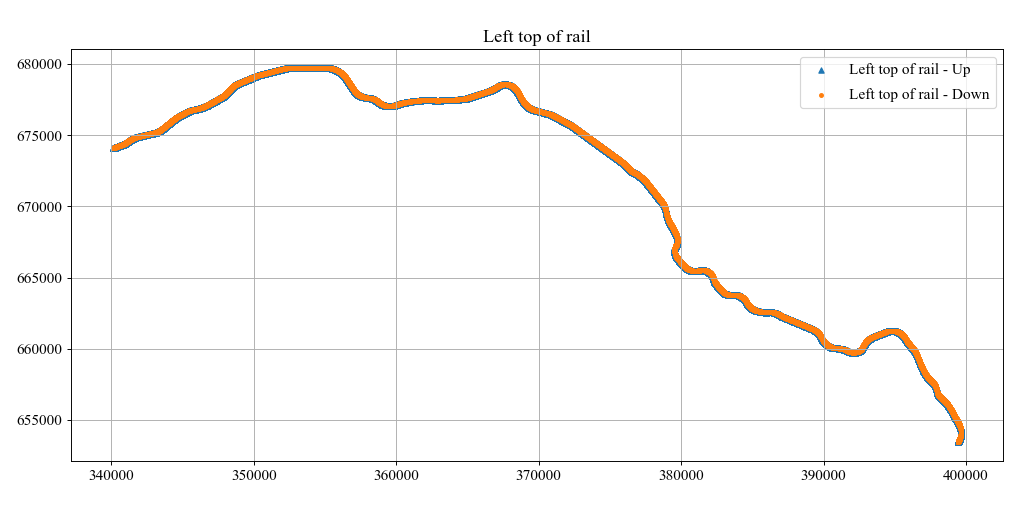

In [5]:
fig2 = plt.figure(num=2, figsize=(12, 6))
ax2 = fig2.add_subplot(aspect='equal', adjustable='box')
ax2.grid()

elem2 = 'Left top of rail'

xyz1 = check_welded_classified_krdz('201910', 'up', elem2)
ax2.scatter(xyz1[:, 0], xyz1[:, 1], s=20, marker='^', label=elem2 + ' - Up')
xyz2 = check_welded_classified_krdz('201910', 'down', elem2)
ax2.scatter(xyz2[:, 0], xyz2[:, 1], s=10, marker='o', label=elem2 + ' - Down')

ax2.set_title(elem2)

ax2.legend()
fig2.tight_layout()

## 3. Centre <a id='3_centre'></a>

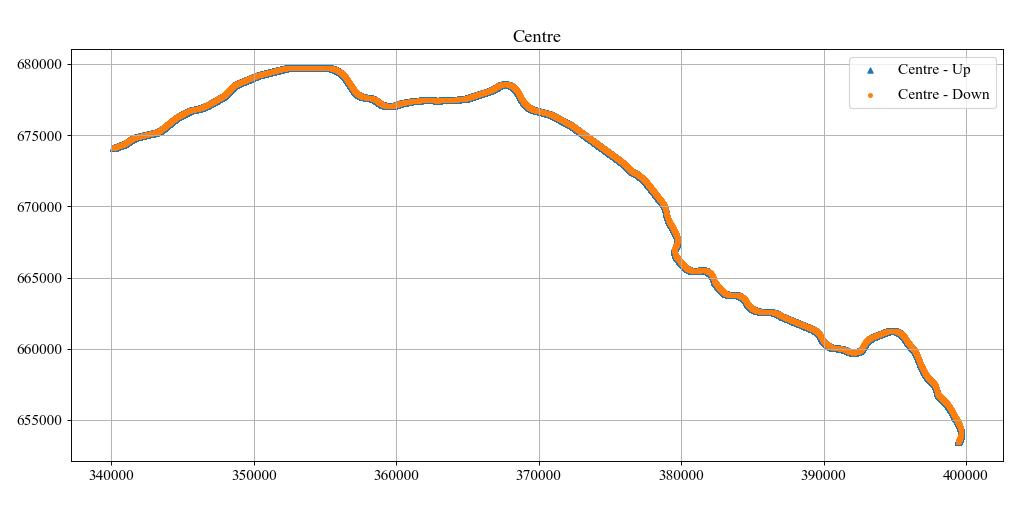

In [6]:
fig3 = plt.figure(num=3, figsize=(12, 6))
ax3 = fig3.add_subplot(aspect='equal', adjustable='box')
ax3.grid()

elem3 = 'Centre'

xyz1 = check_welded_classified_krdz('201910', 'up', elem3)
ax3.scatter(xyz1[:, 0], xyz1[:, 1], s=20, marker='^', label=elem3 + ' - Up')
xyz2 = check_welded_classified_krdz('201910', 'down', elem3)
ax3.scatter(xyz2[:, 0], xyz2[:, 1], s=10, marker='o', label=elem3 + ' - Down')

ax3.set_title(elem3)

ax3.legend()
fig3.tight_layout()

## 4. Right running edge <a id='4_right_running_edge'></a>

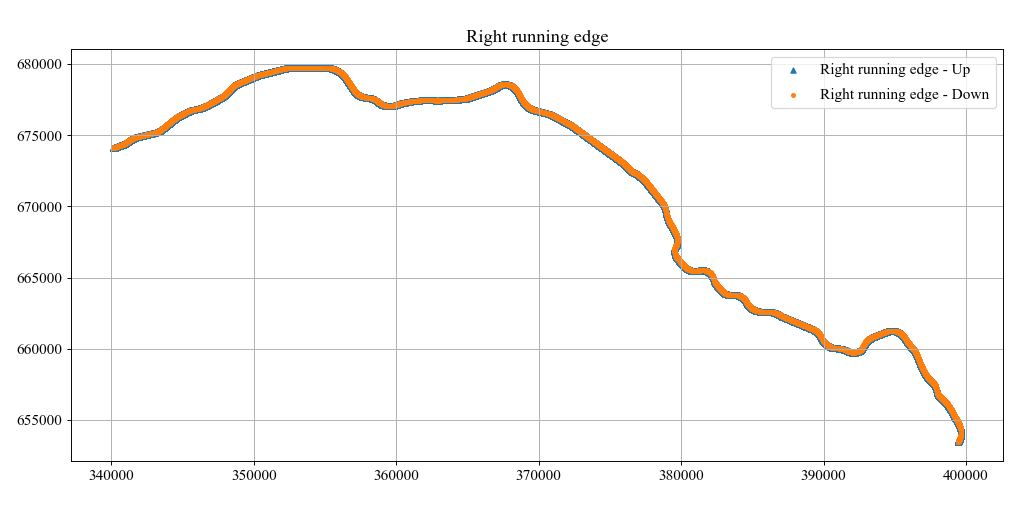

In [7]:
fig4 = plt.figure(num=4, figsize=(12, 6))
ax4 = fig4.add_subplot(aspect='equal', adjustable='box')
ax4.grid()

elem4 = 'Right running edge'

xyz1 = check_welded_classified_krdz('201910', 'up', elem4)
ax4.scatter(xyz1[:, 0], xyz1[:, 1], s=20, marker='^', label=elem4 + ' - Up')
xyz2 = check_welded_classified_krdz('201910', 'down', elem4)
ax4.scatter(xyz2[:, 0], xyz2[:, 1], s=10, marker='o', label=elem4 + ' - Down')

ax4.set_title(elem4)

ax4.legend()
fig4.tight_layout()

## 5. Right top of rail <a id='5_right_top_of_rail'></a>

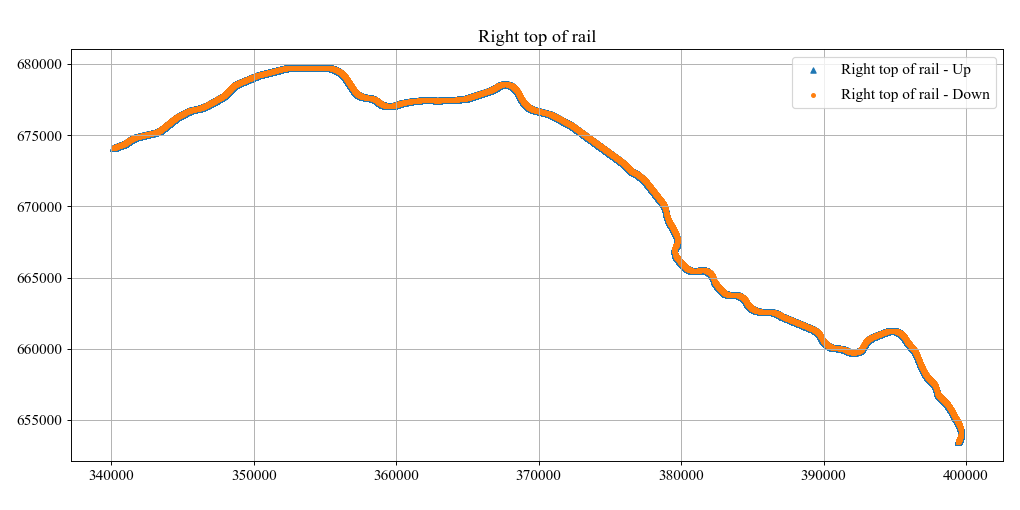

In [8]:
fig5 = plt.figure(num=5, figsize=(12, 6))
ax5 = fig5.add_subplot(aspect='equal', adjustable='box')
ax5.grid()

elem5 = 'Right top of rail'

xyz1 = check_welded_classified_krdz('201910', 'up', elem5)
ax5.scatter(xyz1[:, 0], xyz1[:, 1], s=20, marker='^', label=elem5 + ' - Up')
xyz2 = check_welded_classified_krdz('201910', 'down', elem5)
ax5.scatter(xyz2[:, 0], xyz2[:, 1], s=10, marker='o', label=elem5 + ' - Down')

ax5.set_title(elem5)

ax5.legend()
fig5.tight_layout()

## 6. Up vs. Down (Left top of rail) <a id='6_up_vs_down_left_top_of_rail'></a>

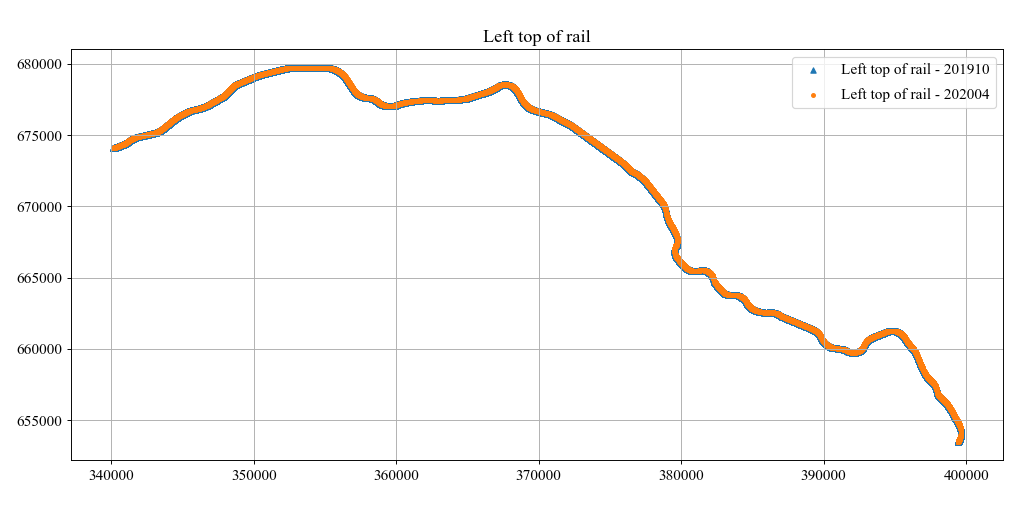

In [9]:
fig6 = plt.figure(num=6, figsize=(12, 6))
ax6 = fig6.add_subplot(aspect='equal', adjustable='box')
ax6.grid()

elem = 'Left top of rail'

xyz1 = check_welded_classified_krdz('201910', 'up', elem)
ax6.scatter(xyz1[:, 0], xyz1[:, 1], s=20, marker='^', label=elem + ' - 201910')
xyz2 = check_welded_classified_krdz('202004', 'up', elem)
ax6.scatter(xyz2[:, 0], xyz2[:, 1], s=10, marker='o', label=elem + ' - 202004')

ax6.set_title(elem)

ax6.legend()
fig6.tight_layout()